<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/nie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
import folium
import webbrowser
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv('/content/drive/My Drive/god.csv')


In [13]:
dfsmooth=df.dropna(axis=1)
dfsmooth.isna().sum()
dfsmooth=dfsmooth[1:]
print(len(dfsmooth))
df.describe().to_csv("Clean.csv")
dfsmooth.head()


500175


,id,REC,Date,Primary Type,Arrest,Year
1,2,5131,11/28/2017 09:43:00 PM,park,YES,2017
2,3,310,12-11-2017 19:15,park,YES,2017
3,4,281,10-08-2017 03:00,park,NO,2017
4,5,620,03/28/2017 02:00:00 PM,park,NO,2017
5,6,810,09-09-2017 20:17,park,NO,2017


In [14]:
c1=dfsmooth.columns.tolist()
dfsmooth=dfsmooth[c1[1:]]
dfsmooth.head()

,REC,Date,Primary Type,Arrest,Year
1,5131,11/28/2017 09:43:00 PM,park,YES,2017
2,310,12-11-2017 19:15,park,YES,2017
3,281,10-08-2017 03:00,park,NO,2017
4,620,03/28/2017 02:00:00 PM,park,NO,2017
5,810,09-09-2017 20:17,park,NO,2017


In [15]:
dfarr=np.array(dfsmooth['Primary Type'])
dfu=np.unique(dfarr)
dfkey=np.unique(np.array(np.array(dfsmooth['Primary Type'])))
dfval=np.array(dfsmooth['Primary Type'].value_counts().values)
print(dfu[:8])
print(dfval[:8])


['apartment' 'commercial centers' 'others' 'park' 'residence' 'street']
[171887  91371  86781  56812  52006  41318]


<BarContainer object of 6 artists>

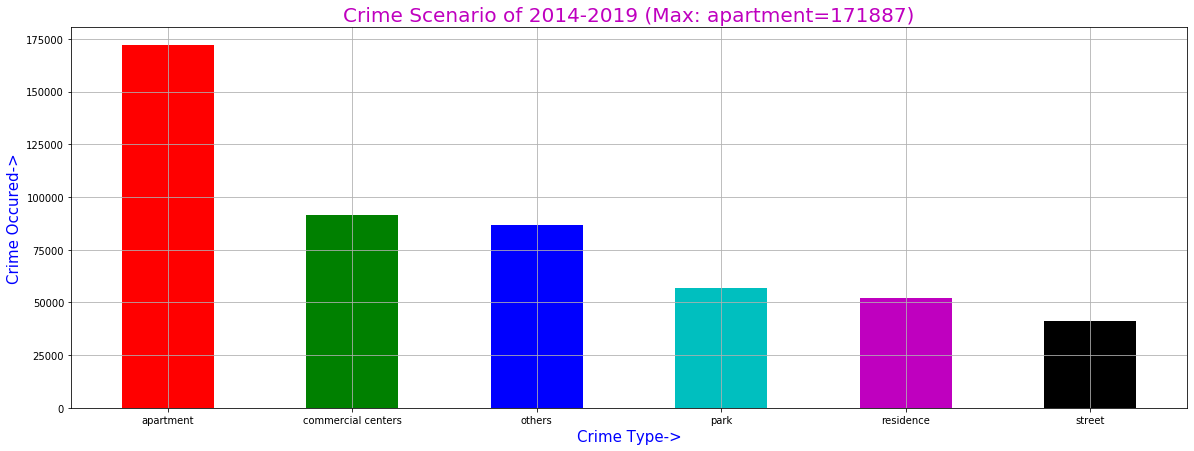

In [17]:
color='rgbcmk'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2014-2019 (Max: {}={})".format(dfu[:8][0],dfval[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(dfu[:8],dfval[:8],color=color,width=0.5)

['apartment' 'commercial centers' 'others' 'park' 'residence' 'street']
[809 559 473 264 200 171]


<BarContainer object of 6 artists>

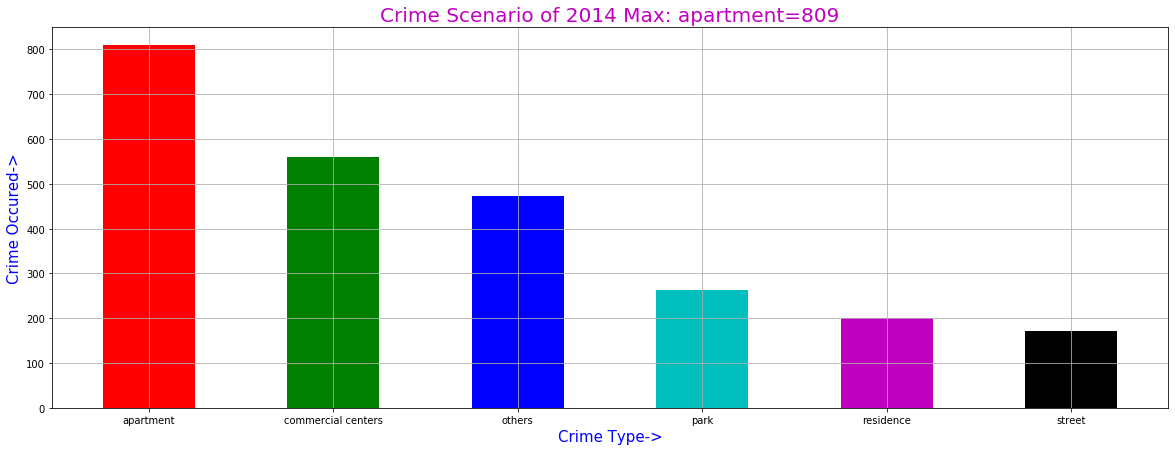

In [22]:
c01=dfsmooth[dfsmooth['Year']==2014]
c01=c01[c01.columns.tolist()[1:]]
c01.head()
c01arr=np.array(c01['Primary Type'])
c01u=np.unique(c01arr)
c01key=np.unique(np.array(np.array(c01['Primary Type'])))
c01val=np.array(c01['Primary Type'].value_counts().values)
print(c01u[:8])
print(c01val[:8])
color='rgbcmk'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2014 Max: {}={}".format(c01u[:8][0],c01val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c01u[:8],c01val[:8],color=color,width=0.5)

['apartment' 'commercial centers' 'others' 'park' 'residence' 'street']
[171623  86497  70208  55055  35872  23711]


<BarContainer object of 6 artists>

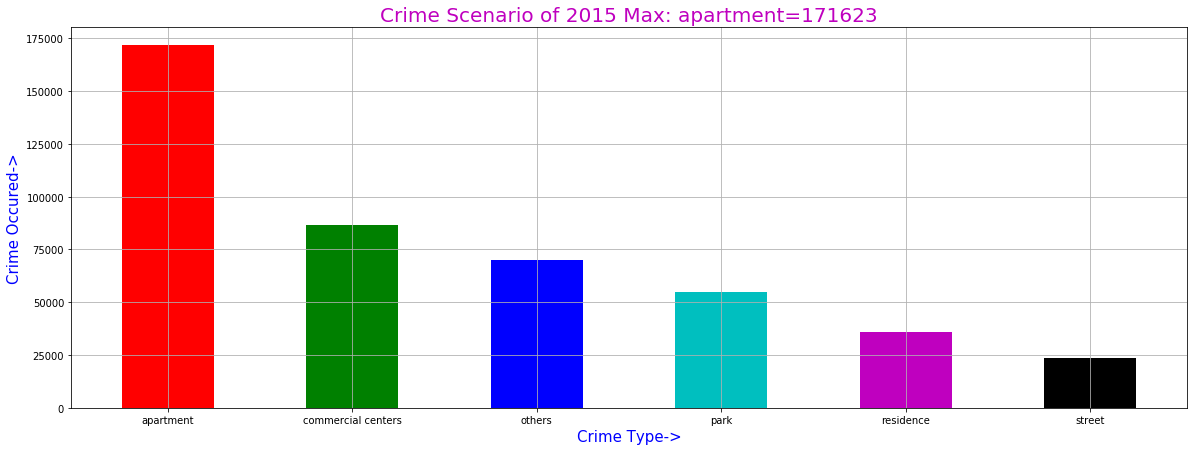

In [23]:
c02=dfsmooth[dfsmooth['Year']==2015]
c02=c02[c02.columns.tolist()[1:]]
c02.head()
c02arr=np.array(c02['Primary Type'])
c02u=np.unique(c02arr)
c02key=np.unique(np.array(np.array(c02['Primary Type'])))
c02val=np.array(c02['Primary Type'].value_counts().values)
print(c02u[:8])
print(c02val[:8])
color='rgbcmk'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2015 Max: {}={}".format(c02u[:8][0],c02val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c02u[:8],c02val[:8],color=color,width=0.5)


['apartment' 'commercial centers' 'others' 'park' 'street']
[3060  456  308   12    6]


<BarContainer object of 5 artists>

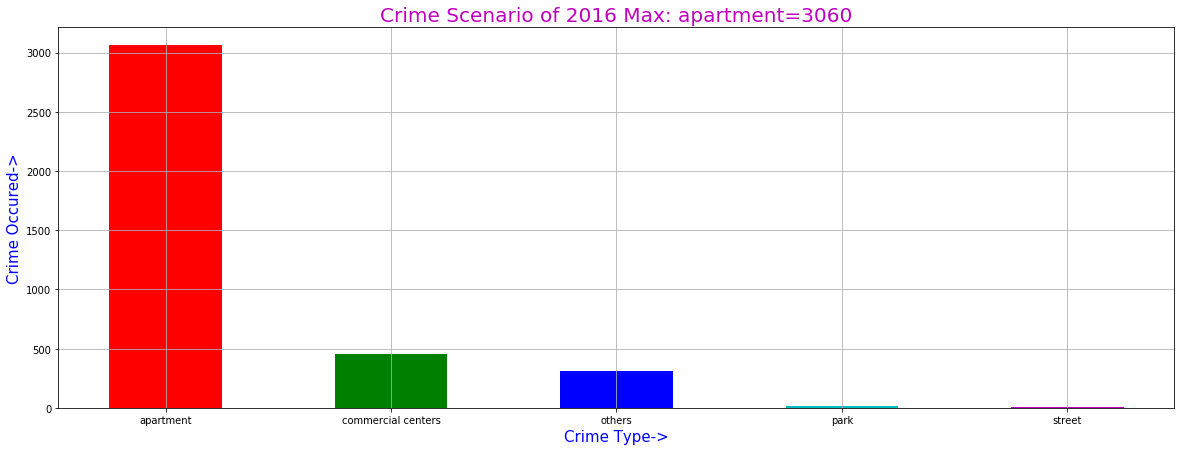

In [24]:
c03=dfsmooth[dfsmooth['Year']==2016]
c03=c03[c03.columns.tolist()[1:]]
c03.head()
c03arr=np.array(c03['Primary Type'])
c03u=np.unique(c03arr)
c03key=np.unique(np.array(np.array(c03['Primary Type'])))
c03val=np.array(c03['Primary Type'].value_counts().values)
print(c03u[:8])
print(c03val[:8])
color='rgbcmk'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2016 Max: {}={}".format(c03u[:8][0],c03val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c03u[:8],c03val[:8],color=color,width=0.5)

['apartment' 'commercial centers' 'others' 'park' 'street']
[24504 20957  1454   402    54]


<BarContainer object of 5 artists>

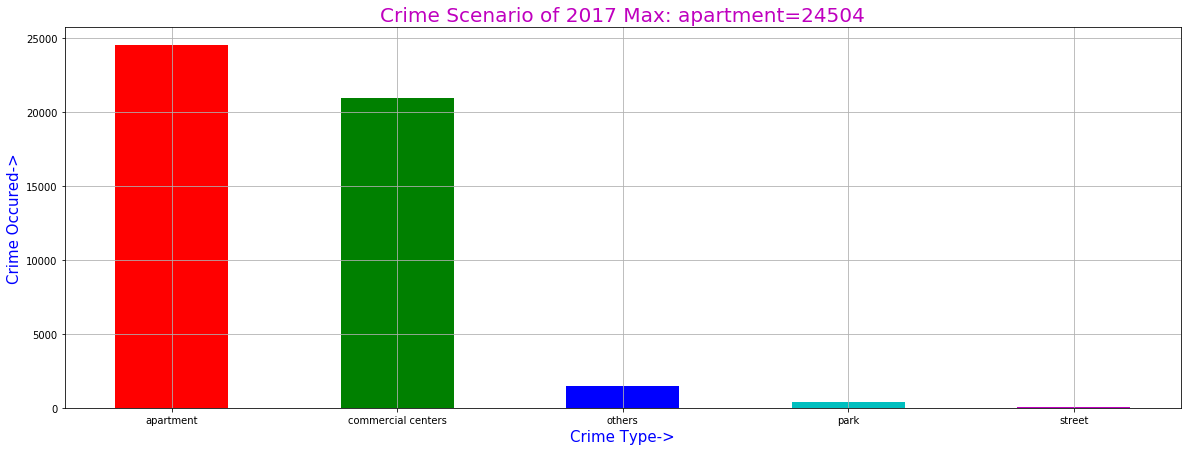

In [25]:
c04=dfsmooth[dfsmooth['Year']==2017]
c04=c04[c04.columns.tolist()[1:]]
c04.head()
c04arr=np.array(c04['Primary Type'])
c04u=np.unique(c04arr)
c04key=np.unique(np.array(np.array(c04['Primary Type'])))
c04val=np.array(c04['Primary Type'].value_counts().values)
print(c04u[:8])
print(c04val[:8])
color='rgbcmk'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2017 Max: {}={}".format(c04u[:8][0],c04val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c04u[:8],c04val[:8],color=color,width=0.5)


['commercial centers' 'others' 'park' 'street']
[2807  366   98   41]


<BarContainer object of 4 artists>

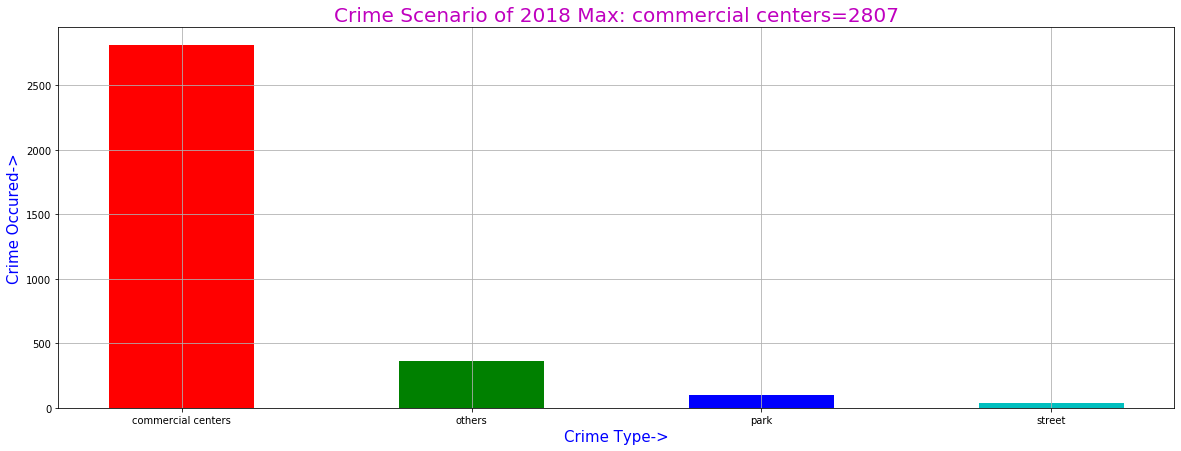

In [26]:
c05=dfsmooth[dfsmooth['Year']==2018]
c05=c05[c05.columns.tolist()[1:]]
c05.head()
c05arr=np.array(c05['Primary Type'])
c05u=np.unique(c05arr)
c05key=np.unique(np.array(np.array(c05['Primary Type'])))
c05val=np.array(c05['Primary Type'].value_counts().values)
print(c05u[:8])
print(c05val[:8])
color='rgbcmk'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2018 Max: {}={}".format(c05u[:8][0],c05val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c05u[:8],c05val[:8],color=color,width=0.5)


['commercial centers' 'others' 'park' 'street']
[74 68 60  6]


<BarContainer object of 4 artists>

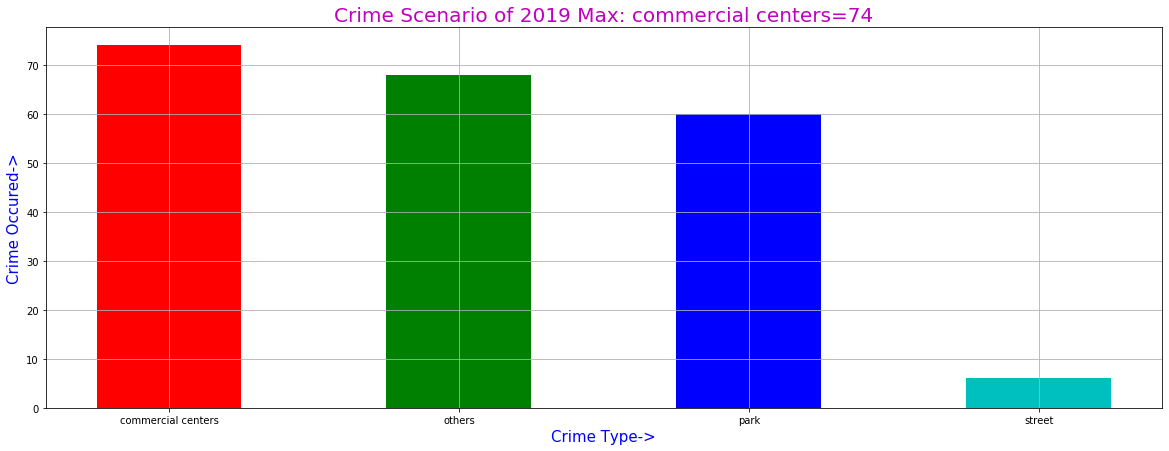

In [27]:
c06=dfsmooth[dfsmooth['Year']==2019]
c06=c06[c06.columns.tolist()[1:]]
c06.head()
c06arr=np.array(c06['Primary Type'])
c06u=np.unique(c06arr)
c06key=np.unique(np.array(np.array(c06['Primary Type'])))
c06val=np.array(c06['Primary Type'].value_counts().values)
print(c06u[:8])
print(c06val[:8])
color='rgbcmk'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2019 Max: {}={}".format(c06u[:8][0],c06val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c06u[:8],c06val[:8],color=color,width=0.5)


In [0]:
arrestno=[] #not_arrested_list
arrestrationo=[] #not_arrested_ratio
arrestratioyes=[] #arrested_ratio


In [30]:
c01arreststat=c01.groupby(['Arrest']).count()['Year'].keys().tolist() #arrest_statistics_representing_true_false
c01arrestcount=c01.groupby(['Arrest']).count()['Year'].values.tolist() #arrest_count_no_of_true_or_false
print(c01arreststat)
print(c01arrestcount)


['NO', 'YES']
[1713, 763]


In [32]:
arrestno.append(c01arrestcount[0])
arrestrationo.append((c01arrestcount[0]/sum(c01arrestcount))*100)
arrestratioyes.append((c01arrestcount[1]/sum(c01arrestcount))*100)
print(arrestno)
print(arrestrationo)
print(arrestratioyes)


[1713]
[69.18416801292408]
[30.81583198707593]


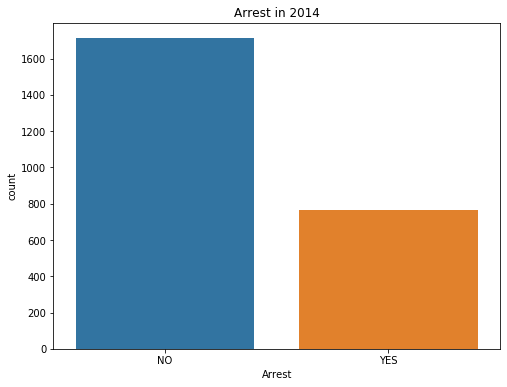

In [33]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2014")
sns.countplot(c01['Arrest'])


['NO', 'YES']
[313470, 129496]
[1713, 313470]
[69.18416801292408, 70.7661536099836]
[30.81583198707593, 29.23384639001639]


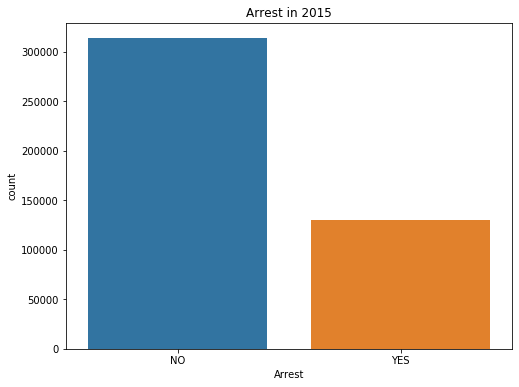

In [35]:
c02arreststat=c02.groupby(['Arrest']).count()['Year'].keys().tolist()
c02arrestcount=c02.groupby(['Arrest']).count()['Year'].values.tolist()
print(c02arreststat)
print(c02arrestcount)
arrestno.append(c02arrestcount[0])
arrestrationo.append((c02arrestcount[0]/sum(c02arrestcount))*100)
arrestratioyes.append((c02arrestcount[1]/sum(c02arrestcount))*100)
print(arrestno)
print(arrestrationo)
print(arrestratioyes)
plt.figure(figsize=(8,6))
plt.title("Arrest in 2015")
sns.countplot(c02['Arrest'])


['NO', 'YES']
[2859, 983]
[1713, 313470, 2859]
[69.18416801292408, 70.7661536099836, 74.41436751691826]
[30.81583198707593, 29.23384639001639, 25.585632483081728]


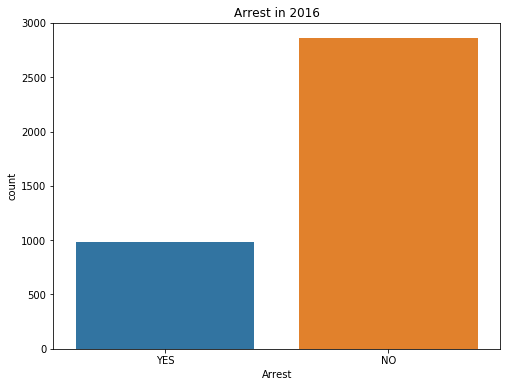

In [36]:
c03arreststat=c03.groupby(['Arrest']).count()['Year'].keys().tolist()
c03arrestcount=c03.groupby(['Arrest']).count()['Year'].values.tolist()
print(c03arreststat)
print(c03arrestcount)
arrestno.append(c03arrestcount[0])
arrestrationo.append((c03arrestcount[0]/sum(c03arrestcount))*100)
arrestratioyes.append((c03arrestcount[1]/sum(c03arrestcount))*100)
print(arrestno)
print(arrestrationo)
print(arrestratioyes)
plt.figure(figsize=(8,6))
plt.title("Arrest in 2016")
sns.countplot(c03['Arrest'])


['NO', 'YES']
[35892, 11479]
[1713, 313470, 2859, 35892]
[69.18416801292408, 70.7661536099836, 74.41436751691826, 75.7678748601465]
[30.81583198707593, 29.23384639001639, 25.585632483081728, 24.232125139853498]


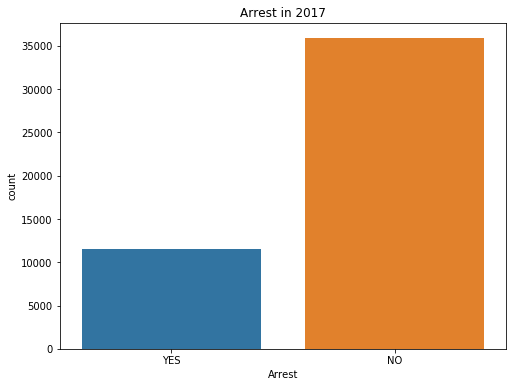

In [37]:
c04arreststat=c04.groupby(['Arrest']).count()['Year'].keys().tolist()
c04arrestcount=c04.groupby(['Arrest']).count()['Year'].values.tolist()
print(c04arreststat)
print(c04arrestcount)
arrestno.append(c04arrestcount[0])
arrestrationo.append((c04arrestcount[0]/sum(c04arrestcount))*100)
arrestratioyes.append((c04arrestcount[1]/sum(c04arrestcount))*100)
print(arrestno)
print(arrestrationo)
print(arrestratioyes)
plt.figure(figsize=(8,6))
plt.title("Arrest in 2017")
sns.countplot(c04['Arrest'])

['NO', 'YES']
[2425, 887]
[1713, 313470, 2859, 35892, 2425, 2425]
[69.18416801292408, 70.7661536099836, 74.41436751691826, 75.7678748601465, 73.21859903381642, 73.21859903381642]
[30.81583198707593, 29.23384639001639, 25.585632483081728, 24.232125139853498, 26.781400966183575, 26.781400966183575]


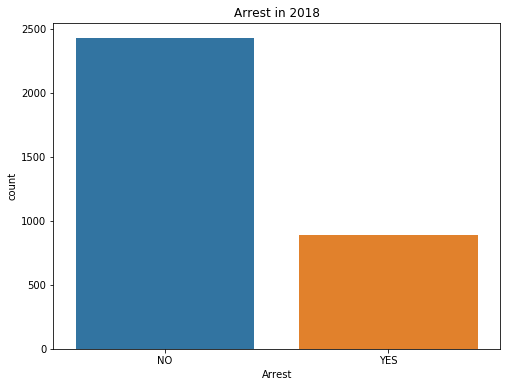

In [39]:
c05arreststat=c05.groupby(['Arrest']).count()['Year'].keys().tolist()
c05arrestcount=c05.groupby(['Arrest']).count()['Year'].values.tolist()
print(c05arreststat)
print(c05arrestcount)
arrestno.append(c05arrestcount[0])
arrestrationo.append((c05arrestcount[0]/sum(c05arrestcount))*100)
arrestratioyes.append((c05arrestcount[1]/sum(c05arrestcount))*100)
print(arrestno)
print(arrestrationo)
print(arrestratioyes)
plt.figure(figsize=(8,6))
plt.title("Arrest in 2018")
sns.countplot(c05['Arrest'])


['NO', 'YES']
[169, 39]
[1713, 313470, 2859, 35892, 2425, 2425, 169]
[69.18416801292408, 70.7661536099836, 74.41436751691826, 75.7678748601465, 73.21859903381642, 73.21859903381642, 81.25]
[30.81583198707593, 29.23384639001639, 25.585632483081728, 24.232125139853498, 26.781400966183575, 26.781400966183575, 18.75]


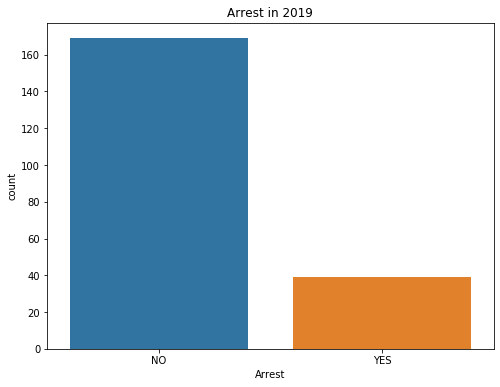

In [40]:
c06arreststat=c06.groupby(['Arrest']).count()['Year'].keys().tolist()
c06arrestcount=c06.groupby(['Arrest']).count()['Year'].values.tolist()
print(c06arreststat)
print(c06arrestcount)
arrestno.append(c06arrestcount[0])
arrestrationo.append((c06arrestcount[0]/sum(c06arrestcount))*100)
arrestratioyes.append((c06arrestcount[1]/sum(c06arrestcount))*100)
print(arrestno)
print(arrestrationo)
print(arrestratioyes)
plt.figure(figsize=(8,6))
plt.title("Arrest in 2019")
sns.countplot(c06['Arrest'])


In [41]:
print(len(arrestno))
print(len(arrestrationo))
print(len(arrestratioyes))
yearlist=[str(i) for i in range(2014,2020)]
print(yearlist)


7
7
7
['2014', '2015', '2016', '2017', '2018', '2019']


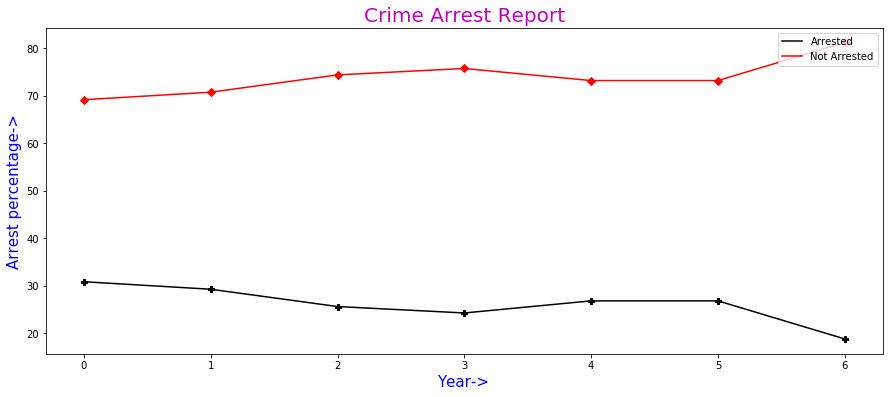

In [43]:
plt.figure(figsize=(15,6))
plt.title("Crime Arrest Report",fontsize=20,color='m')
plt.xlabel("Year->",fontsize=15,color='b')
plt.ylabel("Arrest percentage->",fontsize=15,color='b')
plt.plot(arrestratioyes,"k",label="Arrested")
plt.plot(arrestratioyes,"Pk")
plt.plot(arrestrationo,"r",label="Not Arrested")
plt.plot(arrestrationo,"Dr")
plt.legend(loc="upper right")


In [0]:
import pandas as pd

from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn import model_selection

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

In [0]:
df['Primary Type'].replace(to_replace=['commercial centers','others','park','street','residence','apartment'], value=[0,1,2,3,4,5],inplace=True)

In [0]:
def arrval(val):  
    if val == "NO" :
        return 0
    else:
      return 1


In [47]:
df['arrval'] = df.apply(lambda x: arrval(x["Arrest"]),axis =1 )
df.head()

,id,REC,Date,Primary Type,Arrest,Year,arrval
0,1,1153,01-01-2015 11:00,2,NO,2015,0
1,2,5131,11/28/2017 09:43:00 PM,2,YES,2017,1
2,3,310,12-11-2017 19:15,2,YES,2017,1
3,4,281,10-08-2017 03:00,2,NO,2017,0
4,5,620,03/28/2017 02:00:00 PM,2,NO,2017,0


In [0]:
from sklearn.model_selection import train_test_split


In [50]:
X = df.drop(['id','Date','Arrest','arrval'],axis=1)
X.head()

,REC,Primary Type,Year
0,1153,2,2015
1,5131,2,2017
2,310,2,2017
3,281,2,2017
4,620,2,2017


In [52]:
Y = df.drop(['id','Date','REC','Primary Type','Year','Arrest'],axis=1)
Y.head()

,arrval
0,0
1,1
2,1
3,0
4,0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=12,)
neigh.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [54]:
neigh.score(X_test,Y_test)

0.8594106121796153

In [55]:
from sklearn import tree
estimator = tree.DecisionTreeClassifier()
estimator.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
estimator.score(X_test,Y_test)

0.8606401695389659